# Ungraded Lab: Cats vs. Dogs Class Activation Maps

You will again practice with CAMs in this lab and this time there will only be two classes: Cats and Dogs. You will be revisiting this exercise in this week's programming assignment so it's best if you become familiar with the steps discussed here, particularly in preprocessing the image and building the model.

## Imports

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf

import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,GlobalAveragePooling2D

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import cv2

## Download and Prepare the Dataset

We will use the [Cats vs Dogs](https://www.tensorflow.org/datasets/catalog/cats_vs_dogs) dataset and we can load it via Tensorflow Datasets. The images are labeled 0 for cats and 1 for dogs.

In [4]:
train_data = tfds.load('cats_vs_dogs', split='train[:80%]', as_supervised=True)
validation_data = tfds.load('cats_vs_dogs', split='train[80%:90%]', as_supervised=True)
test_data = tfds.load('cats_vs_dogs', split='train[-10%:]', as_supervised=True)

The cell below will preprocess the images and create batches before feeding it to our model.

In [5]:
def augment_images(image, label):

    # cast to float
    image = tf.cast(image, tf.float32)
    # normalize the pixel values
    image = (image / 255)
    # resize to 300 x 300
    image = tf.image.resize(image, (300, 300))

    return image, label

# use the utility function above to preprocess the images
augmented_training_data = train_data.map(augment_images)

# shuffle and create batches before training
train_batches = augmented_training_data.shuffle(1024).batch(32)

## Build the classifier

This will look familiar to you because it is almost identical to the previous model we built. The key difference is the output is just one unit that is sigmoid activated. This is because we're only dealing with two classes.

In [6]:
model = Sequential()
model.add(Conv2D(16, input_shape=(300, 300, 3), kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 64)       0

The loss can be adjusted from last time to deal with just two classes. For that, we pick `binary_crossentropy`.

In [7]:
# Training will take around 30 minutes to complete using a GPU. Time for a break!

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=tf.keras.optimizers.RMSprop(lr=0.001))
model.fit(train_batches, epochs=25)

Epoch 1/25


/home/pablo/anaconda3/envs/tf-gpu-210/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2023-03-26 17:47:50.678736: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401


168/582 [=======>......................] - ETA: 18s - loss: 0.6791 - accuracy: 0.5647

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


200/582 [=========>....................] - ETA: 17s - loss: 0.6764 - accuracy: 0.5686

210/582 [=========>....................] - ETA: 17s - loss: 0.6748 - accuracy: 0.5716

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


282/582 [=============>................] - ETA: 13s - loss: 0.6697 - accuracy: 0.5765

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


490/582 [========================>.....] - ETA: 4s - loss: 0.6614 - accuracy: 0.5890

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


502/582 [========================>.....] - ETA: 3s - loss: 0.6611 - accuracy: 0.5898

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


512/582 [=========================>....] - ETA: 3s - loss: 0.6608 - accuracy: 0.5902

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


535/582 [==========================>...] - ETA: 2s - loss: 0.6595 - accuracy: 0.5921

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


541/582 [==========================>...] - ETA: 1s - loss: 0.6594 - accuracy: 0.5919

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


547/582 [===========================>..] - ETA: 1s - loss: 0.6594 - accuracy: 0.5923

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


582/582 [==============================] - 32s 47ms/step - loss: 0.6589 - accuracy: 0.5941
Epoch 2/25
167/582 [=======>......................] - ETA: 19s - loss: 0.6470 - accuracy: 0.6149

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


199/582 [=========>....................] - ETA: 17s - loss: 0.6445 - accuracy: 0.6146

209/582 [=========>....................] - ETA: 17s - loss: 0.6449 - accuracy: 0.6121

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


282/582 [=============>................] - ETA: 13s - loss: 0.6394 - accuracy: 0.6195

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


490/582 [========================>.....] - ETA: 4s - loss: 0.6347 - accuracy: 0.6263

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


502/582 [========================>.....] - ETA: 3s - loss: 0.6342 - accuracy: 0.6272

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


512/582 [=========================>....] - ETA: 3s - loss: 0.6336 - accuracy: 0.6278

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


534/582 [==========================>...] - ETA: 2s - loss: 0.6328 - accuracy: 0.6294

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


540/582 [==========================>...] - ETA: 1s - loss: 0.6324 - accuracy: 0.6301

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


546/582 [===========================>..] - ETA: 1s - loss: 0.6325 - accuracy: 0.6302

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


582/582 [==============================] - 27s 46ms/step - loss: 0.6315 - accuracy: 0.6322
Epoch 3/25
167/582 [=======>......................] - ETA: 19s - loss: 0.6149 - accuracy: 0.6589

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


199/582 [=========>....................] - ETA: 18s - loss: 0.6143 - accuracy: 0.6586

209/582 [=========>....................] - ETA: 17s - loss: 0.6156 - accuracy: 0.6576

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


281/582 [=============>................] - ETA: 14s - loss: 0.6123 - accuracy: 0.6600

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


490/582 [========================>.....] - ETA: 4s - loss: 0.6083 - accuracy: 0.6629

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


502/582 [========================>.....] - ETA: 3s - loss: 0.6069 - accuracy: 0.6643

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


512/582 [=========================>....] - ETA: 3s - loss: 0.6072 - accuracy: 0.6651

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


534/582 [==========================>...] - ETA: 2s - loss: 0.6057 - accuracy: 0.6666

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


540/582 [==========================>...] - ETA: 1s - loss: 0.6055 - accuracy: 0.6666

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


546/582 [===========================>..] - ETA: 1s - loss: 0.6043 - accuracy: 0.6674

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


582/582 [==============================] - 27s 46ms/step - loss: 0.6040 - accuracy: 0.6671
Epoch 4/25
166/582 [=======>......................] - ETA: 19s - loss: 0.5932 - accuracy: 0.6828

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


199/582 [=========>....................] - ETA: 17s - loss: 0.5924 - accuracy: 0.6858

209/582 [=========>....................] - ETA: 17s - loss: 0.5942 - accuracy: 0.6841

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


282/582 [=============>................] - ETA: 13s - loss: 0.5909 - accuracy: 0.6845

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


489/582 [========================>.....] - ETA: 4s - loss: 0.5908 - accuracy: 0.6835

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


503/582 [========================>.....] - ETA: 3s - loss: 0.5901 - accuracy: 0.6843

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


513/582 [=========================>....] - ETA: 3s - loss: 0.5897 - accuracy: 0.6849

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


535/582 [==========================>...] - ETA: 2s - loss: 0.5899 - accuracy: 0.6855

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


541/582 [==========================>...] - ETA: 1s - loss: 0.5894 - accuracy: 0.6861

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


546/582 [===========================>..] - ETA: 1s - loss: 0.5890 - accuracy: 0.6864

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


582/582 [==============================] - 27s 45ms/step - loss: 0.5873 - accuracy: 0.6869
Epoch 5/25
167/582 [=======>......................] - ETA: 20s - loss: 0.5837 - accuracy: 0.6922

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


199/582 [=========>....................] - ETA: 18s - loss: 0.5830 - accuracy: 0.6950

209/582 [=========>....................] - ETA: 17s - loss: 0.5815 - accuracy: 0.6954

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


281/582 [=============>................] - ETA: 14s - loss: 0.5783 - accuracy: 0.6982

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


489/582 [========================>.....] - ETA: 4s - loss: 0.5768 - accuracy: 0.7026

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


503/582 [========================>.....] - ETA: 3s - loss: 0.5763 - accuracy: 0.7035

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


512/582 [=========================>....] - ETA: 3s - loss: 0.5759 - accuracy: 0.7028

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


534/582 [==========================>...] - ETA: 2s - loss: 0.5737 - accuracy: 0.7048

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


540/582 [==========================>...] - ETA: 1s - loss: 0.5731 - accuracy: 0.7052

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


546/582 [===========================>..] - ETA: 1s - loss: 0.5728 - accuracy: 0.7053

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


582/582 [==============================] - 27s 46ms/step - loss: 0.5715 - accuracy: 0.7062
Epoch 6/25
166/582 [=======>......................] - ETA: 19s - loss: 0.5645 - accuracy: 0.7103

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


200/582 [=========>....................] - ETA: 18s - loss: 0.5674 - accuracy: 0.7094

210/582 [=========>....................] - ETA: 17s - loss: 0.5659 - accuracy: 0.7104

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


282/582 [=============>................] - ETA: 14s - loss: 0.5607 - accuracy: 0.7109

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


490/582 [========================>.....] - ETA: 4s - loss: 0.5615 - accuracy: 0.7137

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


502/582 [========================>.....] - ETA: 3s - loss: 0.5617 - accuracy: 0.7139

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


512/582 [=========================>....] - ETA: 3s - loss: 0.5615 - accuracy: 0.7136

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


534/582 [==========================>...] - ETA: 2s - loss: 0.5599 - accuracy: 0.7151

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


540/582 [==========================>...] - ETA: 1s - loss: 0.5590 - accuracy: 0.7161

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


546/582 [===========================>..] - ETA: 1s - loss: 0.5592 - accuracy: 0.7160

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


582/582 [==============================] - 27s 46ms/step - loss: 0.5581 - accuracy: 0.7157
Epoch 7/25
167/582 [=======>......................] - ETA: 18s - loss: 0.5538 - accuracy: 0.7217

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


200/582 [=========>....................] - ETA: 17s - loss: 0.5563 - accuracy: 0.7214

210/582 [=========>....................] - ETA: 16s - loss: 0.5541 - accuracy: 0.7231

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


281/582 [=============>................] - ETA: 13s - loss: 0.5535 - accuracy: 0.7232

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


489/582 [========================>.....] - ETA: 4s - loss: 0.5532 - accuracy: 0.7223

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


503/582 [========================>.....] - ETA: 3s - loss: 0.5526 - accuracy: 0.7239

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


513/582 [=========================>....] - ETA: 3s - loss: 0.5527 - accuracy: 0.7237

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


535/582 [==========================>...] - ETA: 2s - loss: 0.5508 - accuracy: 0.7251

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


541/582 [==========================>...] - ETA: 1s - loss: 0.5503 - accuracy: 0.7258

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


547/582 [===========================>..] - ETA: 1s - loss: 0.5498 - accuracy: 0.7258

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


582/582 [==============================] - 26s 45ms/step - loss: 0.5494 - accuracy: 0.7248
Epoch 8/25
167/582 [=======>......................] - ETA: 19s - loss: 0.5375 - accuracy: 0.7335

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


199/582 [=========>....................] - ETA: 17s - loss: 0.5419 - accuracy: 0.7290

209/582 [=========>....................] - ETA: 17s - loss: 0.5406 - accuracy: 0.7292

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


282/582 [=============>................] - ETA: 13s - loss: 0.5399 - accuracy: 0.7298

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


490/582 [========================>.....] - ETA: 4s - loss: 0.5418 - accuracy: 0.7316

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


502/582 [========================>.....] - ETA: 3s - loss: 0.5409 - accuracy: 0.7320

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


512/582 [=========================>....] - ETA: 3s - loss: 0.5410 - accuracy: 0.7314

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


534/582 [==========================>...] - ETA: 2s - loss: 0.5395 - accuracy: 0.7325

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


540/582 [==========================>...] - ETA: 1s - loss: 0.5394 - accuracy: 0.7326

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


546/582 [===========================>..] - ETA: 1s - loss: 0.5393 - accuracy: 0.7324

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


582/582 [==============================] - 27s 45ms/step - loss: 0.5368 - accuracy: 0.7335
Epoch 9/25
166/582 [=======>......................] - ETA: 21s - loss: 0.5372 - accuracy: 0.7412

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


200/582 [=========>....................] - ETA: 19s - loss: 0.5382 - accuracy: 0.7394

210/582 [=========>....................] - ETA: 18s - loss: 0.5397 - accuracy: 0.7391

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


282/582 [=============>................] - ETA: 15s - loss: 0.5321 - accuracy: 0.7412

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


490/582 [========================>.....] - ETA: 4s - loss: 0.5333 - accuracy: 0.7405

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


502/582 [========================>.....] - ETA: 3s - loss: 0.5333 - accuracy: 0.7410

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


512/582 [=========================>....] - ETA: 3s - loss: 0.5325 - accuracy: 0.7418

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


534/582 [==========================>...] - ETA: 2s - loss: 0.5315 - accuracy: 0.7420

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


540/582 [==========================>...] - ETA: 2s - loss: 0.5313 - accuracy: 0.7419

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


547/582 [===========================>..] - ETA: 1s - loss: 0.5307 - accuracy: 0.7426

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


582/582 [==============================] - 29s 48ms/step - loss: 0.5276 - accuracy: 0.7440
Epoch 10/25
166/582 [=======>......................] - ETA: 19s - loss: 0.5270 - accuracy: 0.7492

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


199/582 [=========>....................] - ETA: 17s - loss: 0.5257 - accuracy: 0.7481

210/582 [=========>....................] - ETA: 17s - loss: 0.5247 - accuracy: 0.7485

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


282/582 [=============>................] - ETA: 14s - loss: 0.5217 - accuracy: 0.7486

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


489/582 [========================>.....] - ETA: 4s - loss: 0.5209 - accuracy: 0.7531

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


503/582 [========================>.....] - ETA: 3s - loss: 0.5200 - accuracy: 0.7538

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


513/582 [=========================>....] - ETA: 3s - loss: 0.5208 - accuracy: 0.7534

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


535/582 [==========================>...] - ETA: 2s - loss: 0.5205 - accuracy: 0.7532

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


541/582 [==========================>...] - ETA: 1s - loss: 0.5204 - accuracy: 0.7527

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


547/582 [===========================>..] - ETA: 1s - loss: 0.5196 - accuracy: 0.7530

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


582/582 [==============================] - 27s 46ms/step - loss: 0.5174 - accuracy: 0.7539
Epoch 11/25
166/582 [=======>......................] - ETA: 21s - loss: 0.5083 - accuracy: 0.7643

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


199/582 [=========>....................] - ETA: 19s - loss: 0.5110 - accuracy: 0.7632

210/582 [=========>....................] - ETA: 18s - loss: 0.5104 - accuracy: 0.7637

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


282/582 [=============>................] - ETA: 14s - loss: 0.5092 - accuracy: 0.7647

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


489/582 [========================>.....] - ETA: 4s - loss: 0.5090 - accuracy: 0.7606

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


503/582 [========================>.....] - ETA: 3s - loss: 0.5098 - accuracy: 0.7601

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


513/582 [=========================>....] - ETA: 3s - loss: 0.5097 - accuracy: 0.7599

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


534/582 [==========================>...] - ETA: 2s - loss: 0.5070 - accuracy: 0.7608

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


540/582 [==========================>...] - ETA: 2s - loss: 0.5061 - accuracy: 0.7613

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


546/582 [===========================>..] - ETA: 1s - loss: 0.5055 - accuracy: 0.7619

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


582/582 [==============================] - 28s 47ms/step - loss: 0.5040 - accuracy: 0.7636
Epoch 12/25
166/582 [=======>......................] - ETA: 18s - loss: 0.5010 - accuracy: 0.7658

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


199/582 [=========>....................] - ETA: 17s - loss: 0.5008 - accuracy: 0.7627

209/582 [=========>....................] - ETA: 17s - loss: 0.5019 - accuracy: 0.7618

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


281/582 [=============>................] - ETA: 13s - loss: 0.4982 - accuracy: 0.7626

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


490/582 [========================>.....] - ETA: 4s - loss: 0.4927 - accuracy: 0.7668

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


503/582 [========================>.....] - ETA: 3s - loss: 0.4937 - accuracy: 0.7658

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


513/582 [=========================>....] - ETA: 3s - loss: 0.4926 - accuracy: 0.7667

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


535/582 [==========================>...] - ETA: 2s - loss: 0.4928 - accuracy: 0.7672

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


541/582 [==========================>...] - ETA: 1s - loss: 0.4925 - accuracy: 0.7671

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


547/582 [===========================>..] - ETA: 1s - loss: 0.4924 - accuracy: 0.7672

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


582/582 [==============================] - 27s 45ms/step - loss: 0.4916 - accuracy: 0.7673
Epoch 13/25
168/582 [=======>......................] - ETA: 18s - loss: 0.4850 - accuracy: 0.7775

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


200/582 [=========>....................] - ETA: 17s - loss: 0.4883 - accuracy: 0.7784

210/582 [=========>....................] - ETA: 16s - loss: 0.4869 - accuracy: 0.7789

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


282/582 [=============>................] - ETA: 13s - loss: 0.4819 - accuracy: 0.7788

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


490/582 [========================>.....] - ETA: 4s - loss: 0.4860 - accuracy: 0.7743

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


502/582 [========================>.....] - ETA: 3s - loss: 0.4864 - accuracy: 0.7742

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


512/582 [=========================>....] - ETA: 3s - loss: 0.4857 - accuracy: 0.7744

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


534/582 [==========================>...] - ETA: 2s - loss: 0.4857 - accuracy: 0.7746

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


540/582 [==========================>...] - ETA: 1s - loss: 0.4856 - accuracy: 0.7745

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


546/582 [===========================>..] - ETA: 1s - loss: 0.4852 - accuracy: 0.7744

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


582/582 [==============================] - 27s 44ms/step - loss: 0.4828 - accuracy: 0.7750
Epoch 14/25
167/582 [=======>......................] - ETA: 19s - loss: 0.4798 - accuracy: 0.7816

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


199/582 [=========>....................] - ETA: 17s - loss: 0.4816 - accuracy: 0.7803

209/582 [=========>....................] - ETA: 17s - loss: 0.4827 - accuracy: 0.7798

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


281/582 [=============>................] - ETA: 13s - loss: 0.4732 - accuracy: 0.7840

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


489/582 [========================>.....] - ETA: 4s - loss: 0.4721 - accuracy: 0.7840

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


503/582 [========================>.....] - ETA: 3s - loss: 0.4723 - accuracy: 0.7842

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


513/582 [=========================>....] - ETA: 3s - loss: 0.4718 - accuracy: 0.7846

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


535/582 [==========================>...] - ETA: 2s - loss: 0.4705 - accuracy: 0.7853

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


540/582 [==========================>...] - ETA: 1s - loss: 0.4698 - accuracy: 0.7858

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


546/582 [===========================>..] - ETA: 1s - loss: 0.4699 - accuracy: 0.7855

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


582/582 [==============================] - 26s 45ms/step - loss: 0.4687 - accuracy: 0.7856
Epoch 15/25
167/582 [=======>......................] - ETA: 19s - loss: 0.4736 - accuracy: 0.7826

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


200/582 [=========>....................] - ETA: 17s - loss: 0.4721 - accuracy: 0.7814

209/582 [=========>....................] - ETA: 17s - loss: 0.4700 - accuracy: 0.7838

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


281/582 [=============>................] - ETA: 13s - loss: 0.4715 - accuracy: 0.7833

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


490/582 [========================>.....] - ETA: 4s - loss: 0.4661 - accuracy: 0.7874

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


502/582 [========================>.....] - ETA: 3s - loss: 0.4659 - accuracy: 0.7874

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


512/582 [=========================>....] - ETA: 3s - loss: 0.4652 - accuracy: 0.7880

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


534/582 [==========================>...] - ETA: 2s - loss: 0.4626 - accuracy: 0.7886

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


540/582 [==========================>...] - ETA: 1s - loss: 0.4623 - accuracy: 0.7891

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


546/582 [===========================>..] - ETA: 1s - loss: 0.4622 - accuracy: 0.7892

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


582/582 [==============================] - 27s 45ms/step - loss: 0.4617 - accuracy: 0.7894
Epoch 16/25
166/582 [=======>......................] - ETA: 19s - loss: 0.4621 - accuracy: 0.7892

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


200/582 [=========>....................] - ETA: 17s - loss: 0.4620 - accuracy: 0.7916

210/582 [=========>....................] - ETA: 17s - loss: 0.4620 - accuracy: 0.7912

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


282/582 [=============>................] - ETA: 13s - loss: 0.4615 - accuracy: 0.7900

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


490/582 [========================>.....] - ETA: 4s - loss: 0.4618 - accuracy: 0.7896

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


502/582 [========================>.....] - ETA: 3s - loss: 0.4618 - accuracy: 0.7892

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


512/582 [=========================>....] - ETA: 3s - loss: 0.4614 - accuracy: 0.7892

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


534/582 [==========================>...] - ETA: 2s - loss: 0.4583 - accuracy: 0.7920

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


540/582 [==========================>...] - ETA: 1s - loss: 0.4585 - accuracy: 0.7916

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


546/582 [===========================>..] - ETA: 1s - loss: 0.4580 - accuracy: 0.7917

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


582/582 [==============================] - 27s 45ms/step - loss: 0.4576 - accuracy: 0.7910
Epoch 17/25
167/582 [=======>......................] - ETA: 19s - loss: 0.4515 - accuracy: 0.7977

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


199/582 [=========>....................] - ETA: 17s - loss: 0.4525 - accuracy: 0.7955

209/582 [=========>....................] - ETA: 17s - loss: 0.4520 - accuracy: 0.7958

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


281/582 [=============>................] - ETA: 13s - loss: 0.4498 - accuracy: 0.7967

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


490/582 [========================>.....] - ETA: 4s - loss: 0.4499 - accuracy: 0.7998

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


503/582 [========================>.....] - ETA: 3s - loss: 0.4502 - accuracy: 0.7991

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


513/582 [=========================>....] - ETA: 3s - loss: 0.4502 - accuracy: 0.7993

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


535/582 [==========================>...] - ETA: 2s - loss: 0.4490 - accuracy: 0.8002

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


541/582 [==========================>...] - ETA: 1s - loss: 0.4494 - accuracy: 0.7999

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


547/582 [===========================>..] - ETA: 1s - loss: 0.4497 - accuracy: 0.7999

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


582/582 [==============================] - 27s 45ms/step - loss: 0.4463 - accuracy: 0.8015
Epoch 18/25
167/582 [=======>......................] - ETA: 18s - loss: 0.4448 - accuracy: 0.8007

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


200/582 [=========>....................] - ETA: 17s - loss: 0.4473 - accuracy: 0.8017

210/582 [=========>....................] - ETA: 16s - loss: 0.4492 - accuracy: 0.8012

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


281/582 [=============>................] - ETA: 13s - loss: 0.4451 - accuracy: 0.8029

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


490/582 [========================>.....] - ETA: 4s - loss: 0.4429 - accuracy: 0.8027

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


502/582 [========================>.....] - ETA: 3s - loss: 0.4429 - accuracy: 0.8026

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


512/582 [=========================>....] - ETA: 3s - loss: 0.4432 - accuracy: 0.8023

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


534/582 [==========================>...] - ETA: 2s - loss: 0.4404 - accuracy: 0.8043

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


540/582 [==========================>...] - ETA: 1s - loss: 0.4402 - accuracy: 0.8045

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


546/582 [===========================>..] - ETA: 1s - loss: 0.4405 - accuracy: 0.8045

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


582/582 [==============================] - 26s 45ms/step - loss: 0.4387 - accuracy: 0.8046
Epoch 19/25
166/582 [=======>......................] - ETA: 19s - loss: 0.4326 - accuracy: 0.8106

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


198/582 [=========>....................] - ETA: 17s - loss: 0.4345 - accuracy: 0.8101

209/582 [=========>....................] - ETA: 16s - loss: 0.4354 - accuracy: 0.8100

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


281/582 [=============>................] - ETA: 13s - loss: 0.4399 - accuracy: 0.8071

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


488/582 [========================>.....] - ETA: 4s - loss: 0.4344 - accuracy: 0.8083

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


502/582 [========================>.....] - ETA: 3s - loss: 0.4350 - accuracy: 0.8086

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


512/582 [=========================>....] - ETA: 3s - loss: 0.4339 - accuracy: 0.8091

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


534/582 [==========================>...] - ETA: 2s - loss: 0.4307 - accuracy: 0.8109

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


540/582 [==========================>...] - ETA: 1s - loss: 0.4307 - accuracy: 0.8109

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


546/582 [===========================>..] - ETA: 1s - loss: 0.4312 - accuracy: 0.8108

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


582/582 [==============================] - 26s 45ms/step - loss: 0.4300 - accuracy: 0.8106
Epoch 20/25
166/582 [=======>......................] - ETA: 18s - loss: 0.4290 - accuracy: 0.8112

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


199/582 [=========>....................] - ETA: 17s - loss: 0.4278 - accuracy: 0.8100

208/582 [=========>....................] - ETA: 17s - loss: 0.4264 - accuracy: 0.8102

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


281/582 [=============>................] - ETA: 13s - loss: 0.4283 - accuracy: 0.8108

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


488/582 [========================>.....] - ETA: 4s - loss: 0.4259 - accuracy: 0.8114

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


502/582 [========================>.....] - ETA: 3s - loss: 0.4249 - accuracy: 0.8122

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


512/582 [=========================>....] - ETA: 3s - loss: 0.4251 - accuracy: 0.8119

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


534/582 [==========================>...] - ETA: 2s - loss: 0.4225 - accuracy: 0.8132

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


539/582 [==========================>...] - ETA: 1s - loss: 0.4226 - accuracy: 0.8131

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


545/582 [===========================>..] - ETA: 1s - loss: 0.4222 - accuracy: 0.8131

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


582/582 [==============================] - 27s 45ms/step - loss: 0.4216 - accuracy: 0.8136
Epoch 21/25
167/582 [=======>......................] - ETA: 18s - loss: 0.4247 - accuracy: 0.8149

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


200/582 [=========>....................] - ETA: 17s - loss: 0.4250 - accuracy: 0.8138

210/582 [=========>....................] - ETA: 16s - loss: 0.4233 - accuracy: 0.8149

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


282/582 [=============>................] - ETA: 13s - loss: 0.4200 - accuracy: 0.8148

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


490/582 [========================>.....] - ETA: 4s - loss: 0.4195 - accuracy: 0.8129

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


503/582 [========================>.....] - ETA: 3s - loss: 0.4191 - accuracy: 0.8134

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


512/582 [=========================>....] - ETA: 3s - loss: 0.4175 - accuracy: 0.8139

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


534/582 [==========================>...] - ETA: 2s - loss: 0.4165 - accuracy: 0.8145

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


540/582 [==========================>...] - ETA: 1s - loss: 0.4168 - accuracy: 0.8148

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


546/582 [===========================>..] - ETA: 1s - loss: 0.4167 - accuracy: 0.8151

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


582/582 [==============================] - 27s 45ms/step - loss: 0.4163 - accuracy: 0.8152
Epoch 22/25
167/582 [=======>......................] - ETA: 19s - loss: 0.4135 - accuracy: 0.8192

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


199/582 [=========>....................] - ETA: 17s - loss: 0.4142 - accuracy: 0.8156

209/582 [=========>....................] - ETA: 17s - loss: 0.4144 - accuracy: 0.8158

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


281/582 [=============>................] - ETA: 13s - loss: 0.4117 - accuracy: 0.8173

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


489/582 [========================>.....] - ETA: 4s - loss: 0.4088 - accuracy: 0.8213

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


503/582 [========================>.....] - ETA: 3s - loss: 0.4084 - accuracy: 0.8212

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


513/582 [=========================>....] - ETA: 3s - loss: 0.4093 - accuracy: 0.8210

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


535/582 [==========================>...] - ETA: 2s - loss: 0.4063 - accuracy: 0.8229

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


541/582 [==========================>...] - ETA: 1s - loss: 0.4059 - accuracy: 0.8231

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


547/582 [===========================>..] - ETA: 1s - loss: 0.4052 - accuracy: 0.8235

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


582/582 [==============================] - 26s 44ms/step - loss: 0.4054 - accuracy: 0.8238
Epoch 23/25
166/582 [=======>......................] - ETA: 18s - loss: 0.4172 - accuracy: 0.8217

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


200/582 [=========>....................] - ETA: 17s - loss: 0.4175 - accuracy: 0.8203

210/582 [=========>....................] - ETA: 16s - loss: 0.4128 - accuracy: 0.8226

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


281/582 [=============>................] - ETA: 13s - loss: 0.4113 - accuracy: 0.8210

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


489/582 [========================>.....] - ETA: 4s - loss: 0.4060 - accuracy: 0.8224

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


503/582 [========================>.....] - ETA: 3s - loss: 0.4083 - accuracy: 0.8221

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


513/582 [=========================>....] - ETA: 3s - loss: 0.4081 - accuracy: 0.8221

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


535/582 [==========================>...] - ETA: 2s - loss: 0.4044 - accuracy: 0.8246

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


541/582 [==========================>...] - ETA: 1s - loss: 0.4045 - accuracy: 0.8246

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


547/582 [===========================>..] - ETA: 1s - loss: 0.4039 - accuracy: 0.8246

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


582/582 [==============================] - 26s 44ms/step - loss: 0.4021 - accuracy: 0.8256
Epoch 24/25
167/582 [=======>......................] - ETA: 19s - loss: 0.4022 - accuracy: 0.8271

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


200/582 [=========>....................] - ETA: 17s - loss: 0.4025 - accuracy: 0.8230

210/582 [=========>....................] - ETA: 17s - loss: 0.3999 - accuracy: 0.8244

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


282/582 [=============>................] - ETA: 13s - loss: 0.4022 - accuracy: 0.8242

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


489/582 [========================>.....] - ETA: 4s - loss: 0.3986 - accuracy: 0.8273

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


503/582 [========================>.....] - ETA: 3s - loss: 0.3987 - accuracy: 0.8269

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


513/582 [=========================>....] - ETA: 3s - loss: 0.3987 - accuracy: 0.8268

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


535/582 [==========================>...] - ETA: 2s - loss: 0.3976 - accuracy: 0.8275

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


541/582 [==========================>...] - ETA: 1s - loss: 0.3970 - accuracy: 0.8283

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


547/582 [===========================>..] - ETA: 1s - loss: 0.3965 - accuracy: 0.8286

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


582/582 [==============================] - 27s 45ms/step - loss: 0.3940 - accuracy: 0.8295
Epoch 25/25
167/582 [=======>......................] - ETA: 18s - loss: 0.4034 - accuracy: 0.8278

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


199/582 [=========>....................] - ETA: 17s - loss: 0.3974 - accuracy: 0.8307

209/582 [=========>....................] - ETA: 16s - loss: 0.3971 - accuracy: 0.8304

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


281/582 [=============>................] - ETA: 13s - loss: 0.3934 - accuracy: 0.8310

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


489/582 [========================>.....] - ETA: 4s - loss: 0.3936 - accuracy: 0.8295

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


503/582 [========================>.....] - ETA: 3s - loss: 0.3932 - accuracy: 0.8297

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


512/582 [=========================>....] - ETA: 3s - loss: 0.3930 - accuracy: 0.8300

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


534/582 [==========================>...] - ETA: 2s - loss: 0.3897 - accuracy: 0.8317

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


540/582 [==========================>...] - ETA: 1s - loss: 0.3897 - accuracy: 0.8315

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


546/582 [===========================>..] - ETA: 1s - loss: 0.3889 - accuracy: 0.8317

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


582/582 [==============================] - 27s 45ms/step - loss: 0.3874 - accuracy: 0.8314


## Building the CAM model

You will follow the same steps as before in generating the class activation maps.

In [8]:
gap_weights = model.layers[-1].get_weights()[0]
gap_weights.shape

cam_model = Model(inputs=model.input,
                  outputs=(model.layers[-3].output, 
                           model.layers[-1].output))
cam_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 300, 300, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496 

In [10]:
def show_cam(image_value, features, results):
    ''' Displays the class activation map of an image

    Args:
        image_value (tensor) -- preprocessed input image with size 300 x 300
        features (array) -- features of the image, shape (1, 37, 37, 128)
        results (array) -- output of the sigmoid layer
    '''

    # there is only one image in the batch so we index at `0`
    features_for_img = features[0]
    prediction = results[0]

    # there is only one unit in the output so we get the weights connected to it
    class_activation_weights = gap_weights[:,0]

    # upsample to the image size
    class_activation_features = sp.ndimage.zoom(features_for_img, (300/37, 300/37, 1), order=2)

    # compute the intensity of each feature in the CAM
    cam_output  = np.dot(class_activation_features, class_activation_weights)

    # visualize the results
    print(f'sigmoid output: {results}')
    print(f"prediction: {'dog' if round(results[0][0]) else 'cat'}")
    plt.figure(figsize=(8,8))
    plt.imshow(cam_output, cmap='jet', alpha=0.5)
    plt.imshow(tf.squeeze(image_value), alpha=0.5)
    plt.show()


## Testing the Model

Let's download a few images and see how the class activation maps look like.

In [11]:
!wget -O cat1.jpg https://storage.googleapis.com/tensorflow-1-public/tensorflow-3-temp/MLColabImages/cat1.jpeg
!wget -O cat2.jpg https://storage.googleapis.com/tensorflow-1-public/tensorflow-3-temp/MLColabImages/cat2.jpeg
!wget -O catanddog.jpg https://storage.googleapis.com/tensorflow-1-public/tensorflow-3-temp/MLColabImages/catanddog.jpeg
!wget -O dog1.jpg https://storage.googleapis.com/tensorflow-1-public/tensorflow-3-temp/MLColabImages/dog1.jpeg
!wget -O dog2.jpg https://storage.googleapis.com/tensorflow-1-public/tensorflow-3-temp/MLColabImages/dog2.jpeg

--2023-03-26 18:00:14--  https://storage.googleapis.com/tensorflow-1-public/tensorflow-3-temp/MLColabImages/cat1.jpeg
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.16.144, 142.250.184.208, 142.250.186.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.16.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 414826 (405K) [image/jpeg]
Saving to: ‘cat1.jpg’

cat1.jpg            100%[===================>] 405.10K  1.91MB/s    in 0.2s    

2023-03-26 18:00:15 (1.91 MB/s) - ‘cat1.jpg’ saved [414826/414826]

--2023-03-26 18:00:15--  https://storage.googleapis.com/tensorflow-1-public/tensorflow-3-temp/MLColabImages/cat2.jpeg
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.16.144, 142.250.184.208, 142.250.186.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.16.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 599639 (586K) [image/jpeg]
Saving t

1/1 [==============================] - 0s 440ms/step
sigmoid output: [[0.02931399]]
prediction: cat


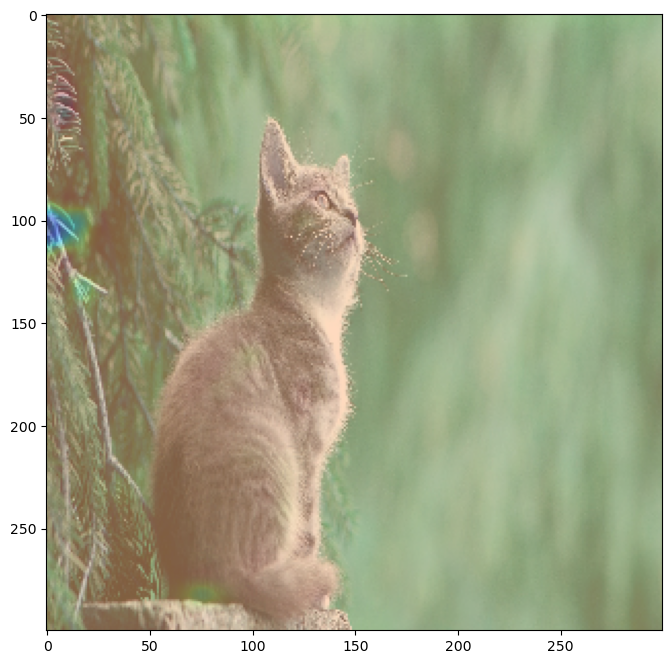

1/1 [==============================] - 0s 16ms/step
sigmoid output: [[0.2979626]]
prediction: cat


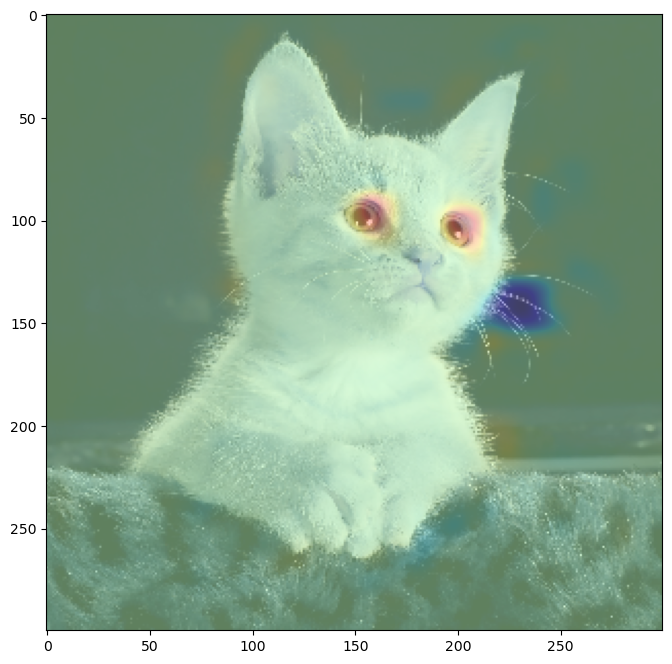

1/1 [==============================] - 0s 16ms/step
sigmoid output: [[0.51408696]]
prediction: dog


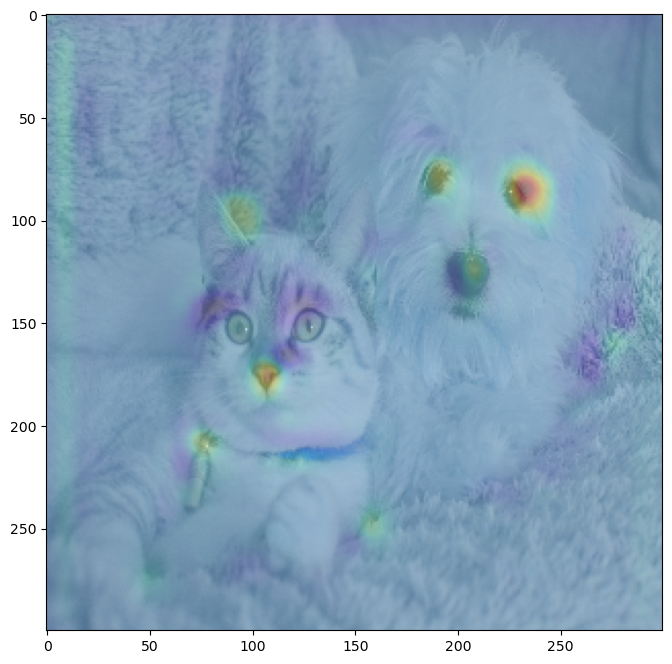

1/1 [==============================] - 0s 16ms/step
sigmoid output: [[0.3837466]]
prediction: cat


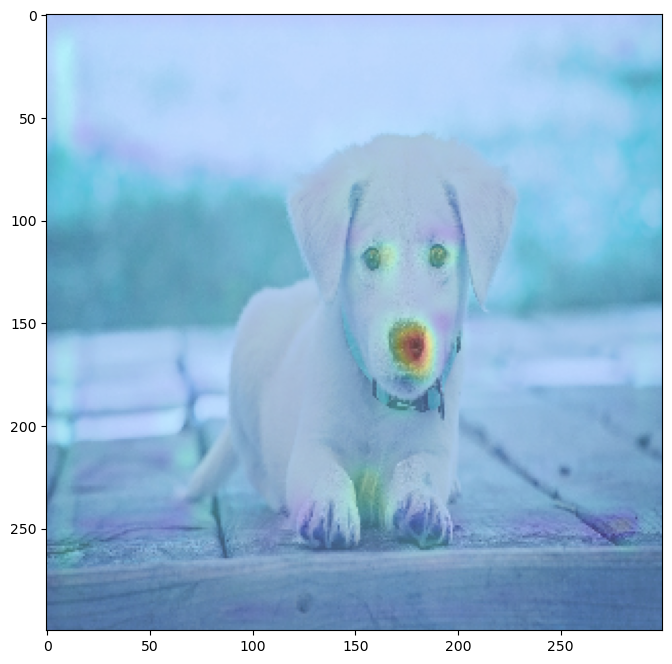

1/1 [==============================] - 0s 13ms/step
sigmoid output: [[0.7944034]]
prediction: dog


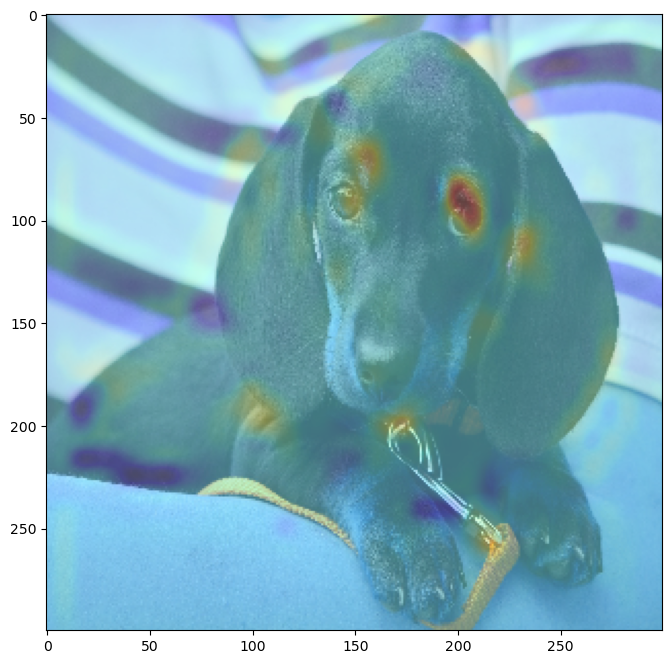

In [12]:
# utility function to preprocess an image and show the CAM
def convert_and_classify(image):

    # load the image
    img = cv2.imread(image)

    # preprocess the image before feeding it to the model
    img = cv2.resize(img, (300,300)) / 255.0

    # add a batch dimension because the model expects it
    tensor_image = np.expand_dims(img, axis=0)

    # get the features and prediction
    features,results = cam_model.predict(tensor_image)

    # generate the CAM
    show_cam(tensor_image, features, results)

convert_and_classify('cat1.jpg')
convert_and_classify('cat2.jpg')
convert_and_classify('catanddog.jpg')
convert_and_classify('dog1.jpg')
convert_and_classify('dog2.jpg')

Let's also try it with some of the test images before we make some observations.

ground truth: cat
1/1 [==============================] - 0s 16ms/step
sigmoid output: [[0.5250255]]
prediction: dog


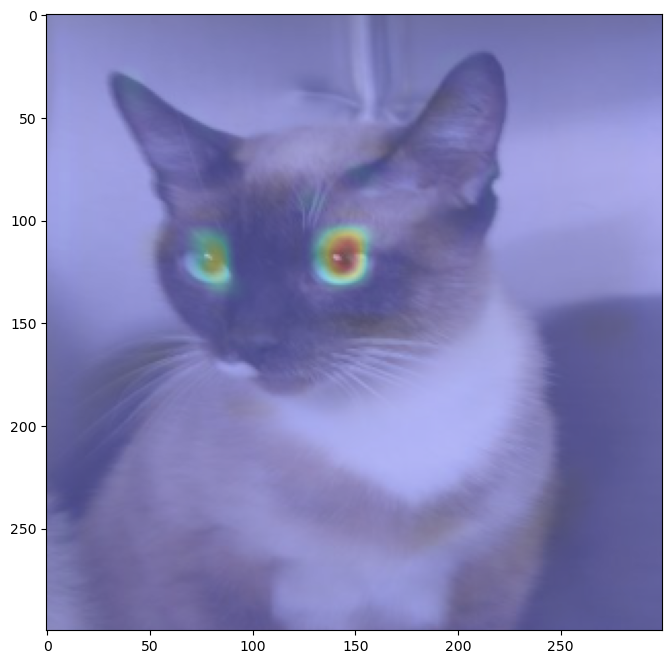

ground truth: dog
1/1 [==============================] - 0s 14ms/step
sigmoid output: [[0.14279442]]
prediction: cat


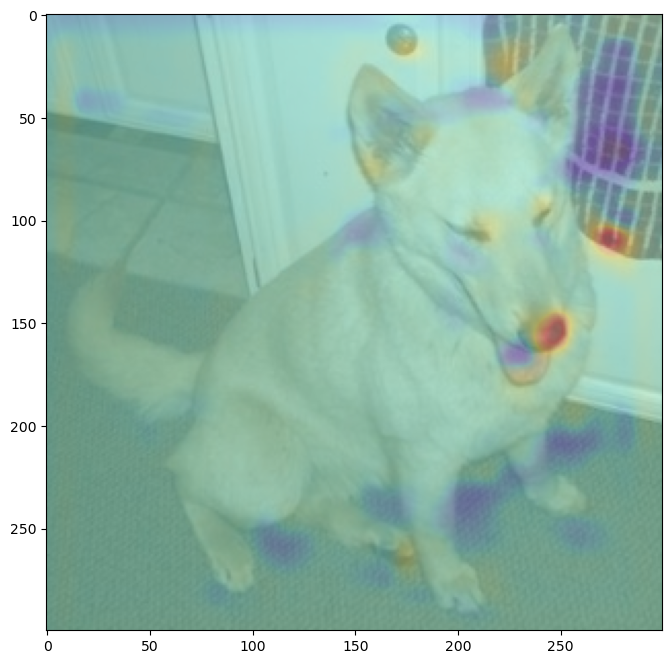

ground truth: dog
1/1 [==============================] - 0s 16ms/step
sigmoid output: [[0.4379705]]
prediction: cat


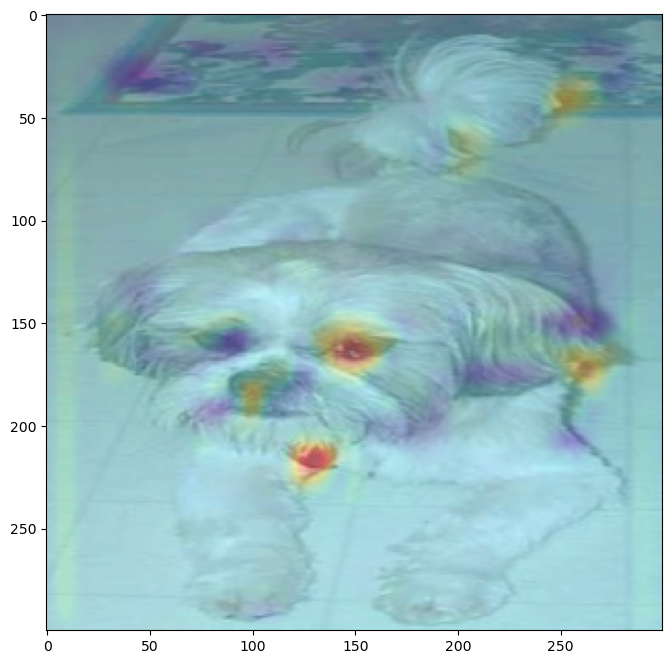

ground truth: cat
1/1 [==============================] - 0s 15ms/step
sigmoid output: [[0.00238535]]
prediction: cat


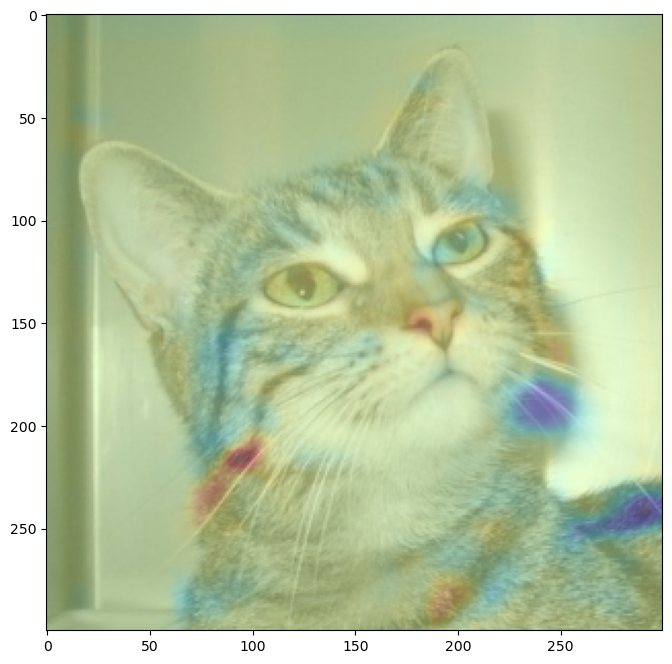

ground truth: cat
1/1 [==============================] - 0s 22ms/step
sigmoid output: [[0.31589258]]
prediction: cat


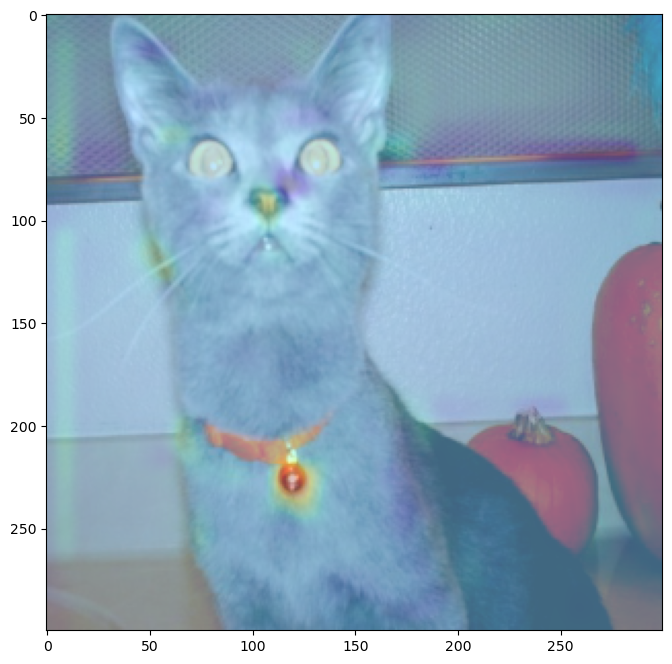

In [13]:
# preprocess the test images
augmented_test_data = test_data.map(augment_images)
test_batches = augmented_test_data.batch(1)

for img, lbl in test_batches.take(5):
    print(f"ground truth: {'dog' if lbl else 'cat'}")
    features,results = cam_model.predict(img)
    show_cam(img, features, results)

If your training reached 80% accuracy, you may notice from the images above that the presence of eyes and nose play a big part in determining a dog, while whiskers and a colar mostly point to a cat. Some can be misclassified based on the presence or absence of these features. This tells us that the model is not yet performing optimally and we need to tweak our process (e.g. add more data, train longer, use a different model, etc).